In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense

In [50]:
df = pd.read_csv("online_shoppers_intention.csv")

In [52]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [53]:
df = df.drop(["Administrative", "Informational", "ProductRelated_Duration", "Month"], axis=1)

In [54]:
df.columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [55]:
df_visitor_type = pd.get_dummies(df["VisitorType"])
df = pd.concat([df, df_visitor_type], axis=1)

In [57]:
le2 = LabelEncoder().fit(df["Revenue"])
le_nm2 = dict(zip(le2.classes_, le2.transform(le2.classes_)))
df["Revenue"] = df["Revenue"].apply(lambda x: le_nm2[x])

In [58]:
le_nm2

{False: 0, True: 1}

In [59]:
le3 = LabelEncoder().fit(df["Weekend"])
le_nm3 = dict(zip(le3.classes_, le3.transform(le3.classes_)))
df["Weekend"] = df["Weekend"].apply(lambda x: le_nm3[x])

In [60]:
le_nm3

{False: 0, True: 1}

In [62]:
len(df.columns)

17

In [100]:
X = df.drop(["Revenue", "VisitorType"], axis=1)
y = df["Revenue"]
y = np.asarray(y).astype(np.float32)

In [102]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=4242)

In [110]:
model = Sequential([
    Dense(18, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(2, activation="softmax")
])

In [111]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [112]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
347/347 [==============================] - 0s 583us/step - loss: 0.5647 - accuracy: 0.8383 - val_loss: 0.3332 - val_accuracy: 0.8889
Epoch 2/100
347/347 [==============================] - 0s 441us/step - loss: 0.3723 - accuracy: 0.8761 - val_loss: 0.2996 - val_accuracy: 0.8962
Epoch 3/100
347/347 [==============================] - 0s 435us/step - loss: 0.3331 - accuracy: 0.8805 - val_loss: 0.3567 - val_accuracy: 0.8832
Epoch 4/100
347/347 [==============================] - 0s 431us/step - loss: 0.3265 - accuracy: 0.8835 - val_loss: 0.3018 - val_accuracy: 0.8865
Epoch 5/100
347/347 [==============================] - 0s 448us/step - loss: 0.3108 - accuracy: 0.8872 - val_loss: 0.3028 - val_accuracy: 0.8808
Epoch 6/100
347/347 [==============================] - 0s 444us/step - loss: 0.3012 - accuracy: 0.8860 - val_loss: 0.2669 - val_accuracy: 0.8938
Epoch 7/100
347/347 [==============================] - 0s 437us/step - loss: 0.3023 - accuracy: 0.8867 - val_loss: 0.2734 - val_ac

347/347 [==============================] - 0s 438us/step - loss: 0.2413 - accuracy: 0.8998 - val_loss: 0.2508 - val_accuracy: 0.9011
Epoch 58/100
347/347 [==============================] - 0s 435us/step - loss: 0.2390 - accuracy: 0.9007 - val_loss: 0.2609 - val_accuracy: 0.8873
Epoch 59/100
347/347 [==============================] - 0s 438us/step - loss: 0.2398 - accuracy: 0.8997 - val_loss: 0.2586 - val_accuracy: 0.8954
Epoch 60/100
347/347 [==============================] - 0s 445us/step - loss: 0.2383 - accuracy: 0.9001 - val_loss: 0.2590 - val_accuracy: 0.8889
Epoch 61/100
347/347 [==============================] - 0s 440us/step - loss: 0.2379 - accuracy: 0.9002 - val_loss: 0.2551 - val_accuracy: 0.8921
Epoch 62/100
347/347 [==============================] - 0s 433us/step - loss: 0.2397 - accuracy: 0.8994 - val_loss: 0.2543 - val_accuracy: 0.8970
Epoch 63/100
347/347 [==============================] - 0s 437us/step - loss: 0.2378 - accuracy: 0.9005 - val_loss: 0.2711 - val_accuracy

In [113]:
model.save("CustomerRevenue.h5")

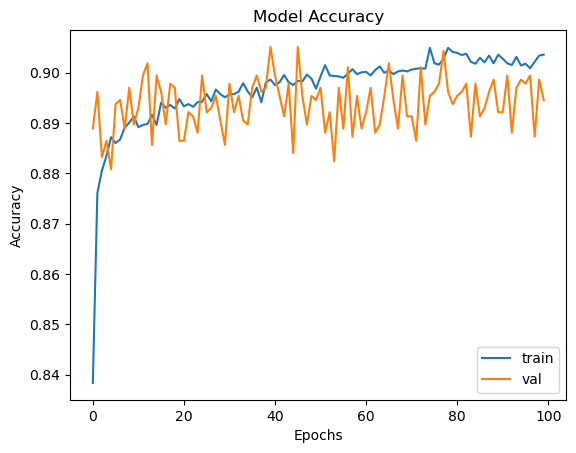

In [116]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

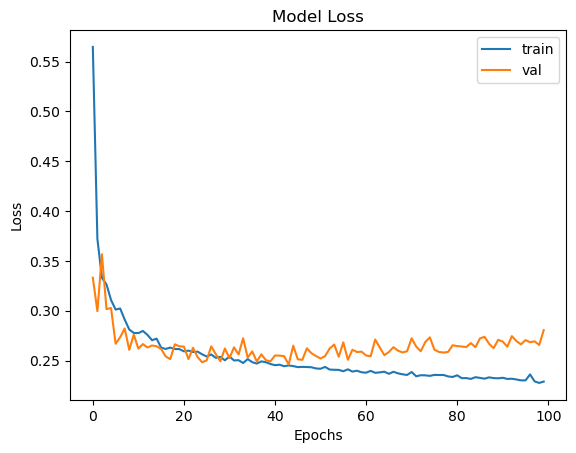

In [117]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()